In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [3]:
df=pd.read_csv(r"C:\Users\Rishabh Johri\Downloads\mushroom-classification/mushrooms.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [5]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [6]:
X=df.drop('class',axis=1)
y=df['class'] 
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


In [7]:
from sklearn.preprocessing import LabelEncoder
Encoder_X = LabelEncoder() 
for col in X.columns:
    X[col] = Encoder_X.fit_transform(X[col])
Encoder_y=LabelEncoder()
y = Encoder_y.fit_transform(y)

In [8]:
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1


In [9]:
y

array([1, 0, 0, ..., 0, 1, 0])

In [10]:
X=pd.get_dummies(X,columns=X.columns,drop_first=True)
X.head()

,cap-shape_1,cap-shape_2,cap-shape_3,cap-shape_4,cap-shape_5,cap-surface_1,cap-surface_2,cap-surface_3,cap-color_1,cap-color_2,...,population_2,population_3,population_4,population_5,habitat_1,habitat_2,habitat_3,habitat_4,habitat_5,habitat_6
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [14]:
def visualization_train(model):
    sns.set_context(context='notebook',font_scale=2)
    plt.figure(figsize=(16,9))
    from matplotlib.colors import ListedColormap
    X_set, y_set = X_train, y_train
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.6, cmap = ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('red', 'green'))(i), label = j)
    plt.title("%s Training Set" %(model))
    plt.xlabel('PC 1')
    plt.ylabel('PC 2')
    plt.legend()
def visualization_test(model):
    sns.set_context(context='notebook',font_scale=2)
    plt.figure(figsize=(16,9))
    from matplotlib.colors import ListedColormap
    X_set, y_set = X_test, y_test
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.6, cmap = ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('red', 'green'))(i), label = j)
    plt.title("%s Test Set" %(model))
    plt.xlabel('PC 1')
    plt.ylabel('PC 2')
    plt.legend()
    
    
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
def print_score(classifier,X_train,y_train,X_test,y_test,train=True):
    if train == True:
        print("Training results:\n")
        print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_train,classifier.predict(X_train))))
        print('Classification Report:\n{}\n'.format(classification_report(y_train,classifier.predict(X_train))))
        print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_train,classifier.predict(X_train))))
        res = cross_val_score(classifier, X_train, y_train, cv=10, n_jobs=-1, scoring='accuracy')
        print('Average Accuracy:\t{0:.4f}\n'.format(res.mean()))
        print('Standard Deviation:\t{0:.4f}'.format(res.std()))
    elif train == False:
        print("Test results:\n")
        print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_test,classifier.predict(X_test))))
        print('Classification Report:\n{}\n'.format(classification_report(y_test,classifier.predict(X_test))))
        print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_test,classifier.predict(X_test))))

In [15]:
#logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

classifier.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
print_score(classifier,X_train,y_train,X_test,y_test,train=True)

Training results:

Accuracy Score: 0.9057

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.91      2951
           1       0.96      0.84      0.90      2735

    accuracy                           0.91      5686
   macro avg       0.91      0.90      0.90      5686
weighted avg       0.91      0.91      0.91      5686


Confusion Matrix:
[[2849  102]
 [ 434 2301]]

Average Accuracy:	0.9057

Standard Deviation:	0.0097


In [18]:
print_score(classifier,X_train,y_train,X_test,y_test,train=False)

Test results:

Accuracy Score: 0.9028

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1257
           1       0.96      0.83      0.89      1181

    accuracy                           0.90      2438
   macro avg       0.91      0.90      0.90      2438
weighted avg       0.91      0.90      0.90      2438


Confusion Matrix:
[[1218   39]
 [ 198  983]]



In [19]:
#saving model 
filename = 'mushroomLogisticRegression.sav'
pickle.dump(classifier, open(filename, 'wb'))

In [20]:
#KNN

In [21]:
from sklearn.neighbors import KNeighborsClassifier as KNN

classifier = KNN()
classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [35]:
print_score(classifier,X_train,y_train,X_test,y_test,train=True)

Training results:

Accuracy Score: 0.9434

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      2951
           1       0.97      0.92      0.94      2735

    accuracy                           0.94      5686
   macro avg       0.95      0.94      0.94      5686
weighted avg       0.94      0.94      0.94      5686


Confusion Matrix:
[[2861   90]
 [ 232 2503]]

Average Accuracy:	0.9312

Standard Deviation:	0.0096


In [36]:
print_score(classifier,X_train,y_train,X_test,y_test,train=False)

Test results:

Accuracy Score: 0.9307

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.93      1257
           1       0.96      0.90      0.93      1181

    accuracy                           0.93      2438
   macro avg       0.93      0.93      0.93      2438
weighted avg       0.93      0.93      0.93      2438


Confusion Matrix:
[[1211   46]
 [ 123 1058]]



In [37]:
#saving model 
filename = 'mushroomKNN.sav'
pickle.dump(classifier, open(filename, 'wb'))

In [42]:
#Support Vector classifier

In [24]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf',random_state=42)

classifier.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=42,
    shrinking=True, tol=0.001, verbose=False)

In [40]:
print_score(classifier,X_train,y_train,X_test,y_test,train=True)

Training results:

Accuracy Score: 0.9289

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.93      2951
           1       0.97      0.88      0.92      2735

    accuracy                           0.93      5686
   macro avg       0.93      0.93      0.93      5686
weighted avg       0.93      0.93      0.93      5686


Confusion Matrix:
[[2884   67]
 [ 337 2398]]

Average Accuracy:	0.9281

Standard Deviation:	0.0112


In [41]:
print_score(classifier,X_train,y_train,X_test,y_test,train=False)

Test results:

Accuracy Score: 0.9258

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93      1257
           1       0.98      0.87      0.92      1181

    accuracy                           0.93      2438
   macro avg       0.93      0.92      0.93      2438
weighted avg       0.93      0.93      0.93      2438


Confusion Matrix:
[[1232   25]
 [ 156 1025]]



In [43]:
#saving model 
filename = 'mushroomSVC.sav'
pickle.dump(classifier, open(filename, 'wb'))

In [44]:
#decision tree classifier

In [27]:
from sklearn.tree import DecisionTreeClassifier as DT

classifier = DT(criterion='entropy',random_state=42)
classifier.fit(X_train,y_train)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [46]:
print_score(classifier,X_train,y_train,X_test,y_test,train=True)

Training results:

Accuracy Score: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2951
           1       1.00      1.00      1.00      2735

    accuracy                           1.00      5686
   macro avg       1.00      1.00      1.00      5686
weighted avg       1.00      1.00      1.00      5686


Confusion Matrix:
[[2951    0]
 [   0 2735]]

Average Accuracy:	0.8939

Standard Deviation:	0.0120


In [47]:
print_score(classifier,X_train,y_train,X_test,y_test,train=False)

Test results:

Accuracy Score: 0.9028

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.91      0.91      1257
           1       0.90      0.90      0.90      1181

    accuracy                           0.90      2438
   macro avg       0.90      0.90      0.90      2438
weighted avg       0.90      0.90      0.90      2438


Confusion Matrix:
[[1143  114]
 [ 123 1058]]



In [48]:
#saving model 
filename = 'mushroomDecisionTree.sav'
pickle.dump(classifier, open(filename, 'wb'))

In [49]:
#Random Forest Classification

In [30]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [51]:
print_score(classifier,X_train,y_train,X_test,y_test,train=True)

Training results:

Accuracy Score: 0.9993

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2951
           1       1.00      1.00      1.00      2735

    accuracy                           1.00      5686
   macro avg       1.00      1.00      1.00      5686
weighted avg       1.00      1.00      1.00      5686


Confusion Matrix:
[[2951    0]
 [   4 2731]]

Average Accuracy:	0.9293

Standard Deviation:	0.0102


In [52]:
print_score(classifier,X_train,y_train,X_test,y_test,train=False)

Test results:

Accuracy Score: 0.9311

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.94      1257
           1       0.96      0.90      0.93      1181

    accuracy                           0.93      2438
   macro avg       0.93      0.93      0.93      2438
weighted avg       0.93      0.93      0.93      2438


Confusion Matrix:
[[1213   44]
 [ 124 1057]]



In [53]:
#save model
filename = 'mushroomRandomForest.sav'
pickle.dump(classifier, open(filename, 'wb'))

In [54]:
#Visualising data for the 5 classification algorithms :
# 1) Logistic Regression
# 2) KNN
# 3) SVC
# 4) Decision Tree Classifier
# 5) Random Forest Classifier

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


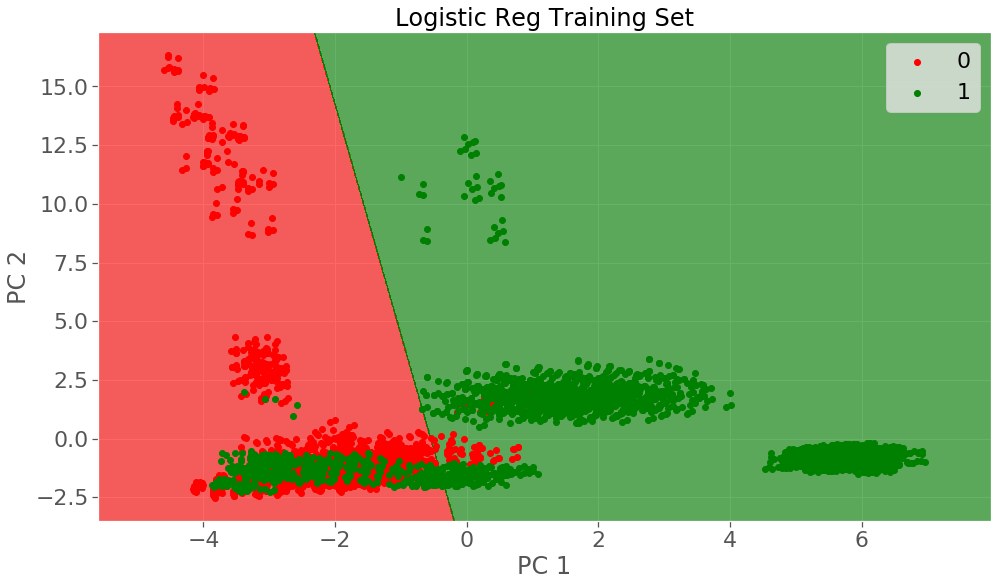

In [58]:
visualization_train('Logistic Reg')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


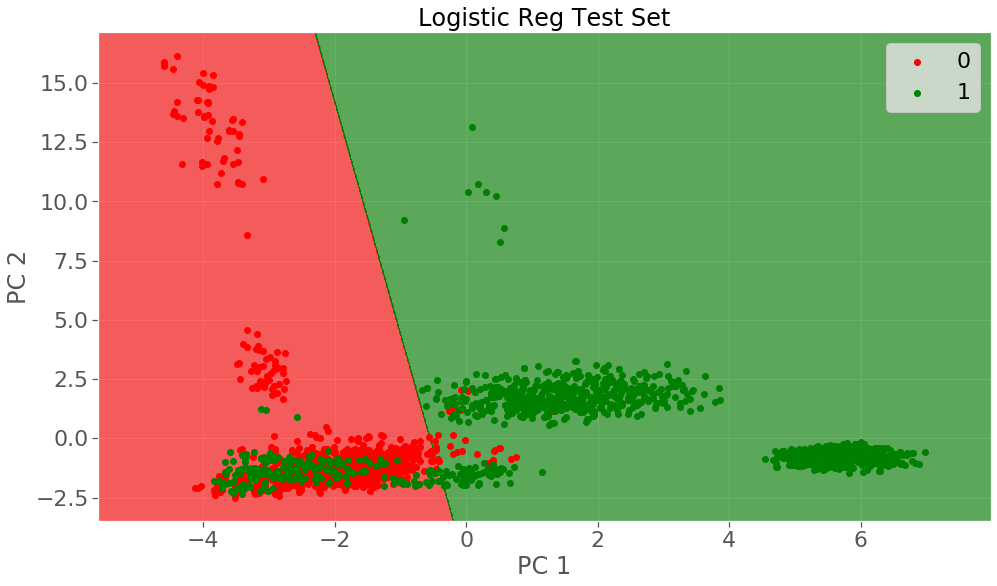

In [59]:
visualization_test('Logistic Reg')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


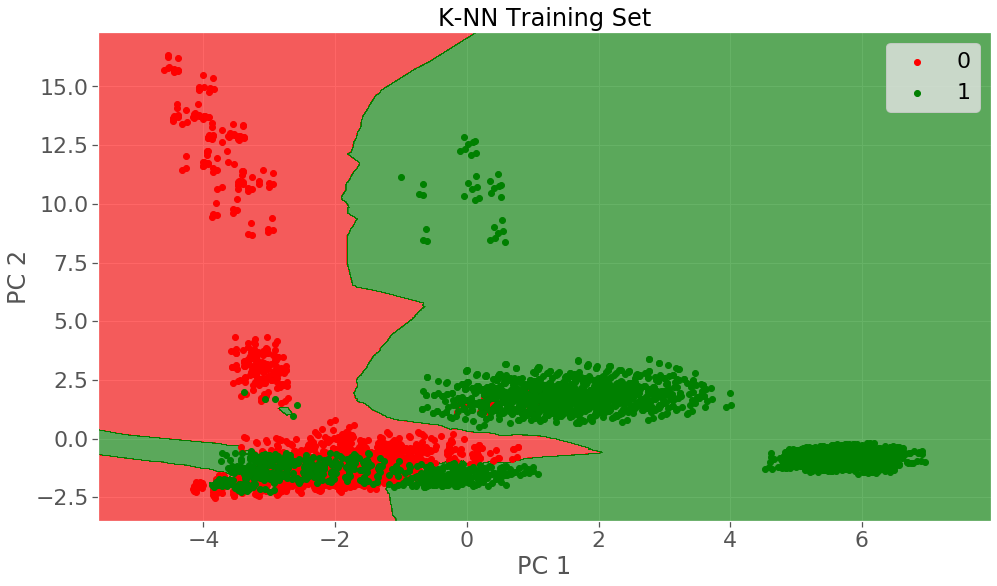

In [22]:
visualization_train('K-NN')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


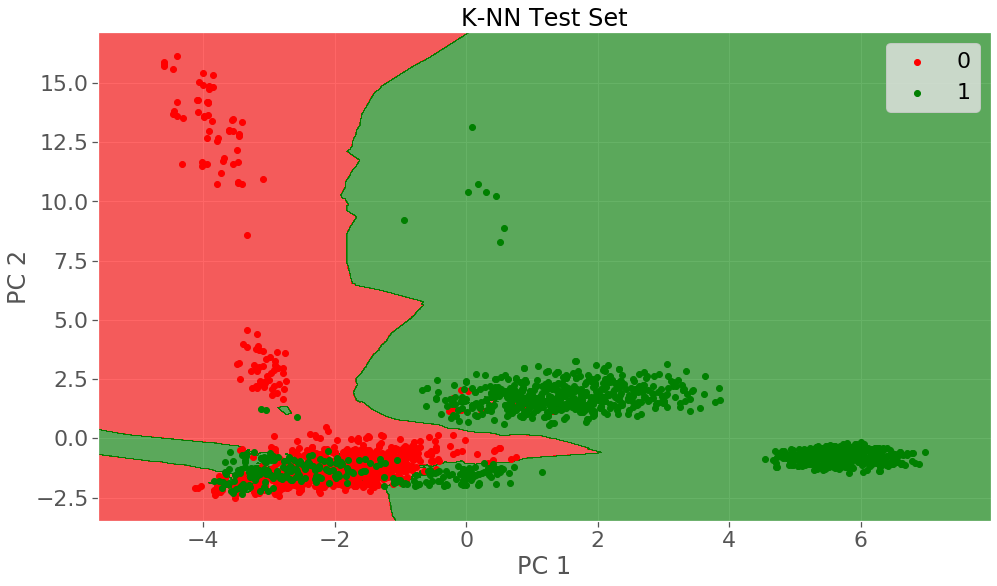

In [23]:
visualization_test('K-NN')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


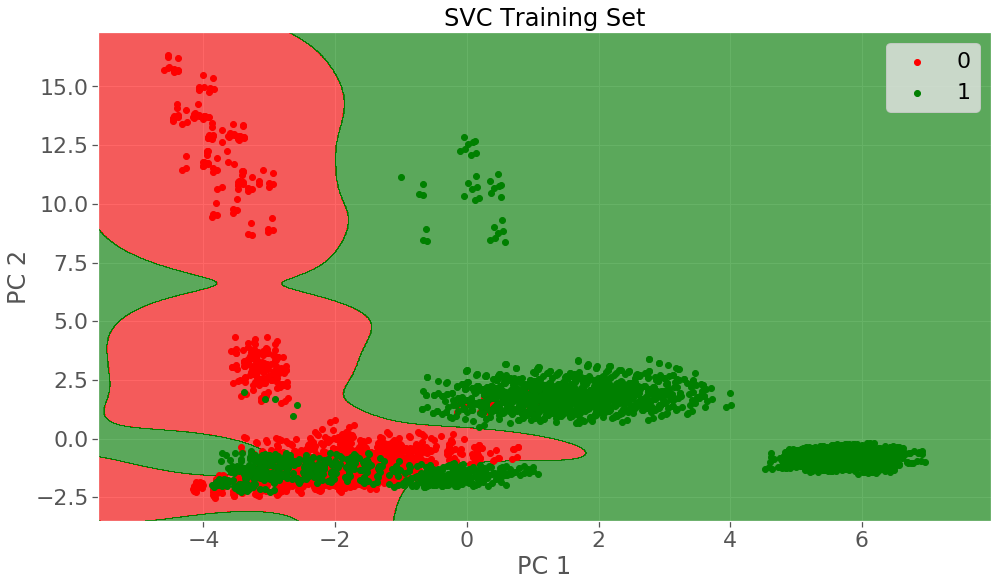

In [25]:
visualization_train('SVC')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


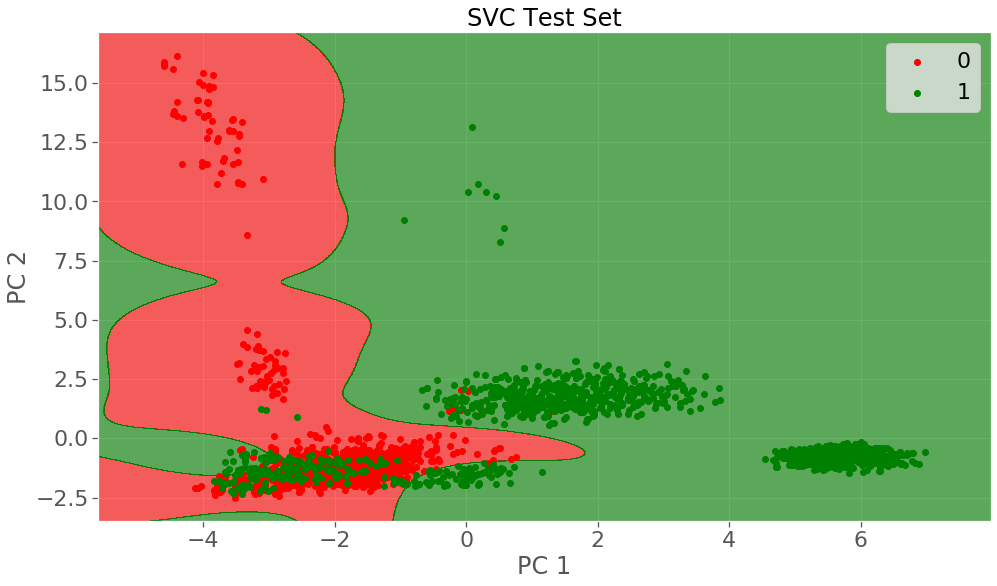

In [26]:
visualization_test('SVC')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


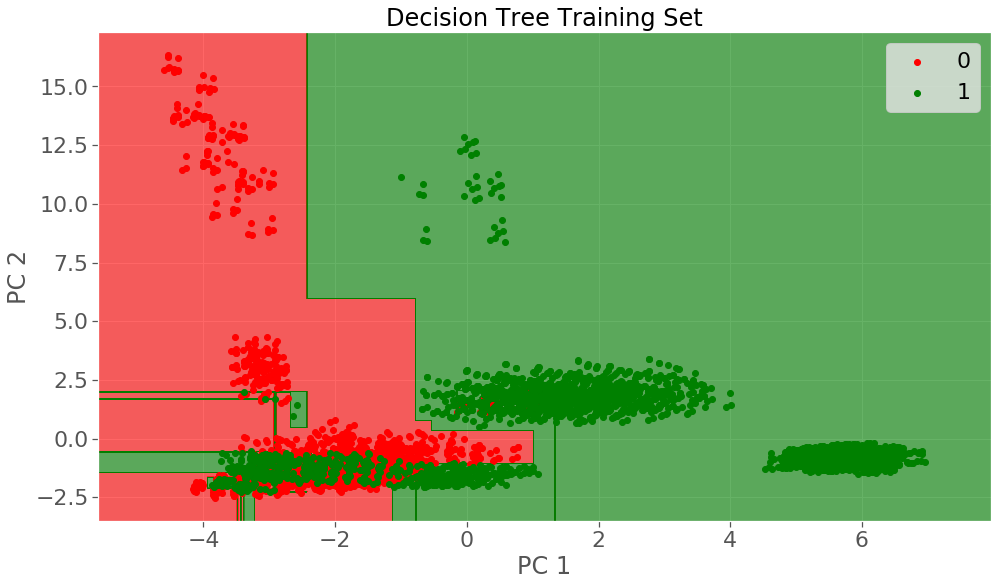

In [28]:
visualization_train('Decision Tree')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


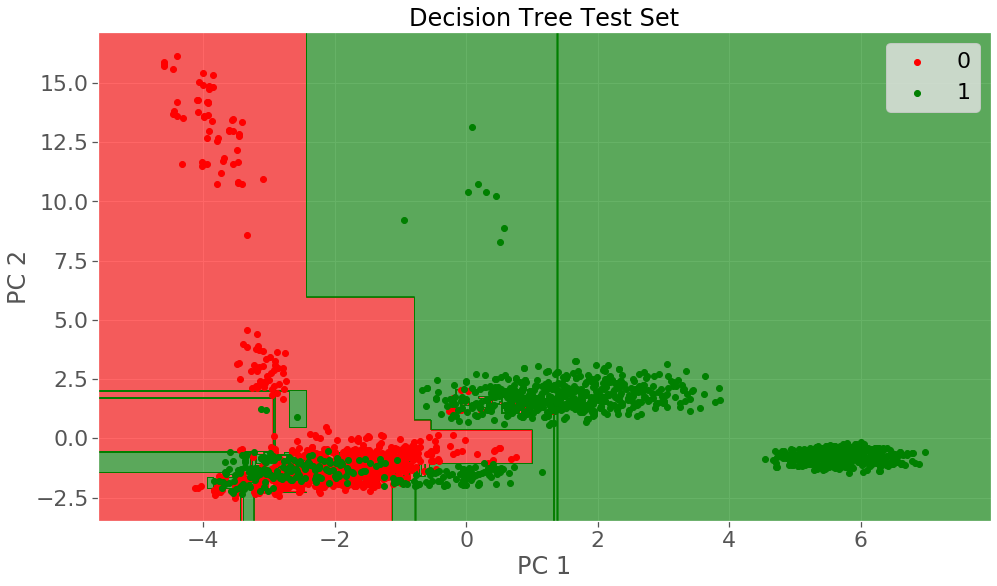

In [29]:
visualization_test('Decision Tree')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


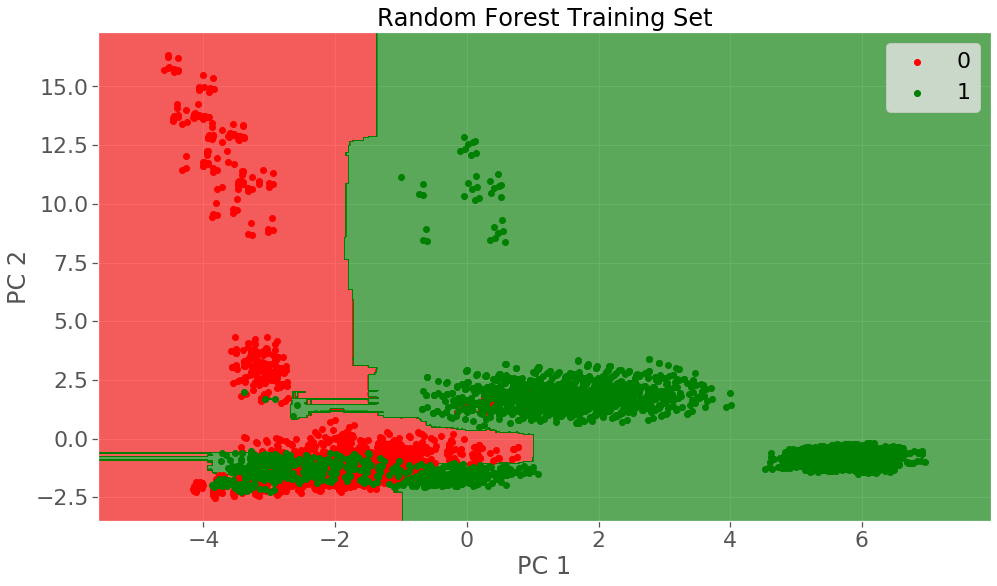

In [31]:
visualization_train('Random Forest')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


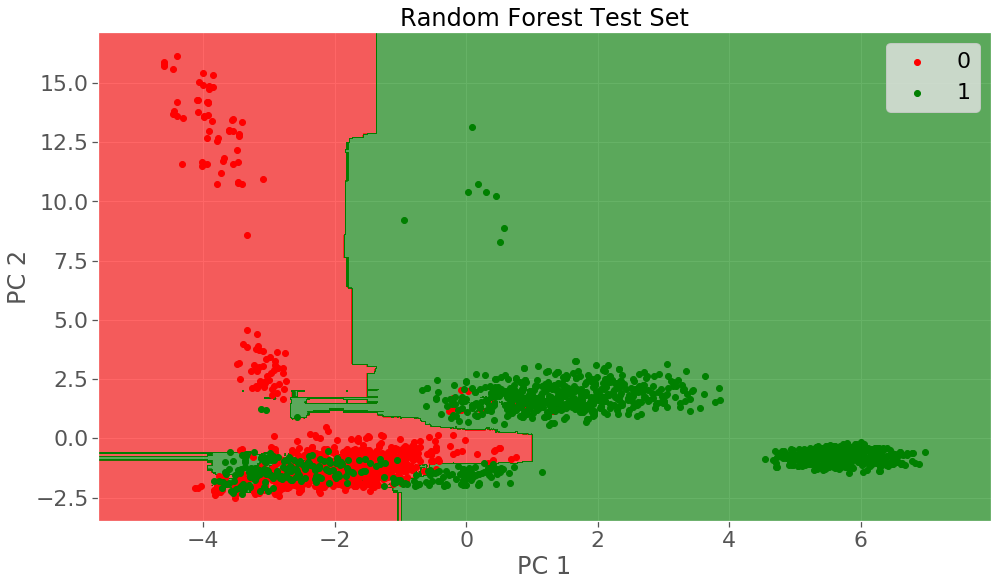

In [32]:
visualization_test('Random Forest')

In [33]:
#Naive Bayes classifier

In [34]:
from sklearn.naive_bayes import GaussianNB as NB

classifier = NB()
classifier.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [36]:
print_score(classifier,X_train,y_train,X_test,y_test,train=True)
print("_______________________________________________________")
print_score(classifier,X_train,y_train,X_test,y_test,train=False)

Training results:

Accuracy Score: 0.8980

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      2951
           1       0.96      0.83      0.89      2735

    accuracy                           0.90      5686
   macro avg       0.91      0.90      0.90      5686
weighted avg       0.90      0.90      0.90      5686


Confusion Matrix:
[[2845  106]
 [ 474 2261]]

Average Accuracy:	0.8982

Standard Deviation:	0.0114
_______________________________________________________
Test results:

Accuracy Score: 0.8966

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.97      0.91      1257
           1       0.96      0.82      0.89      1181

    accuracy                           0.90      2438
   macro avg       0.91      0.89      0.90      2438
weighted avg       0.90      0.90      0.90      2438


Confusion Matrix:
[[1215   42]
 [ 210  971]]



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


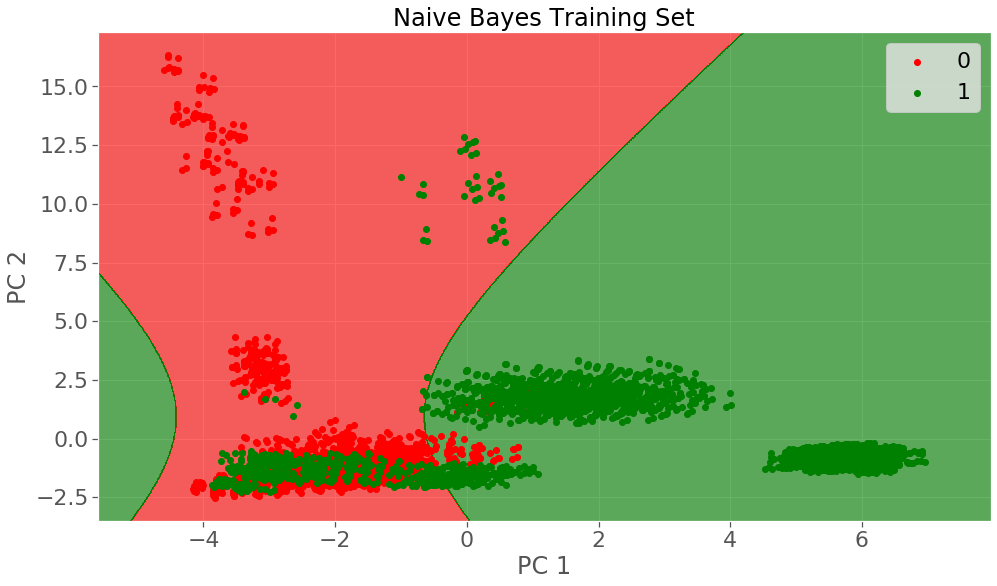

In [37]:
visualization_train('Naive Bayes')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


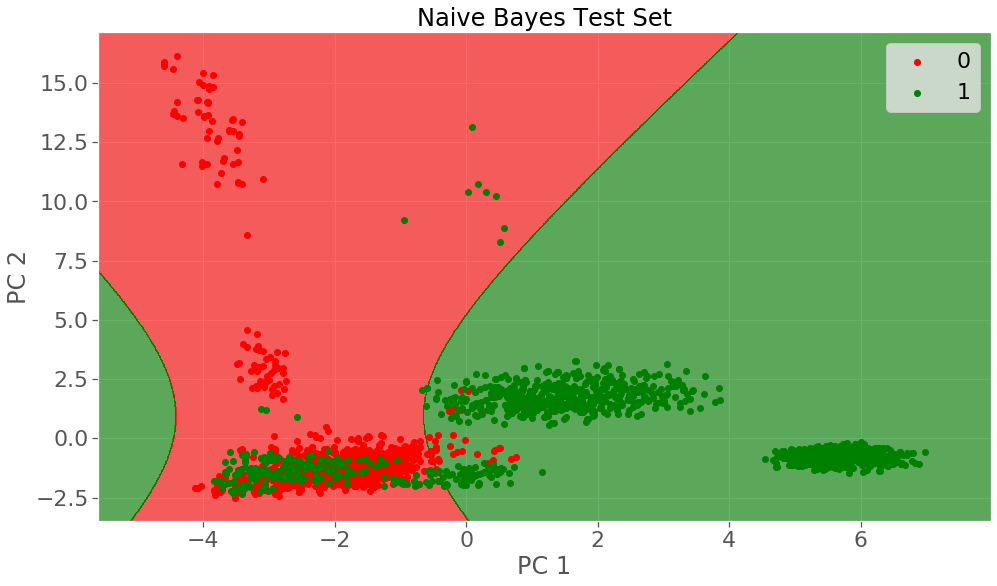

In [38]:
visualization_test('Naive Bayes')

In [39]:
#save model
filename = 'mushroomNaiveBayes.sav'
pickle.dump(classifier, open(filename, 'wb'))